# Day 89: AI in Retail and E-Commerce - Recommendation Systems

## Introduction

In today's digital economy, **recommendation systems** have become an integral part of the e-commerce experience. Whether you're shopping on Amazon, watching content on Netflix, or listening to music on Spotify, recommendation systems are working behind the scenes to personalize your experience and suggest items you might like.

Recommendation systems are AI-powered tools that analyze user behavior, preferences, and patterns to suggest products, services, or content that users are likely to find relevant. In the retail and e-commerce sector, these systems drive significant business value by:

1. **Increasing Sales**: By suggesting relevant products, recommendation systems can increase purchase rates and average order values
2. **Improving Customer Experience**: Personalized recommendations help customers discover products they might not have found otherwise
3. **Building Customer Loyalty**: When customers feel understood and receive relevant suggestions, they're more likely to return
4. **Reducing Decision Fatigue**: In an era of overwhelming choice, recommendations help narrow down options

According to various industry reports, recommendation systems can account for 30-40% of total revenue for major e-commerce platforms. Amazon attributes approximately 35% of its revenue to its recommendation engine, while Netflix estimates that 80% of watched content comes from recommendations.

## Learning Objectives

By the end of this lesson, you will be able to:

1. Understand the different types of recommendation systems and their applications
2. Implement collaborative filtering using user-item matrices
3. Calculate similarity metrics like cosine similarity for recommendations
4. Build a basic content-based recommendation system
5. Evaluate recommendation system performance
6. Understand the challenges and limitations of recommendation systems

## Types of Recommendation Systems

There are three main approaches to building recommendation systems:

### 1. Content-Based Filtering

Content-based filtering recommends items similar to those a user has liked in the past. This approach analyzes the features or attributes of items and matches them with user preferences.

**How it works:**
- Analyze the characteristics of items (e.g., product category, brand, price, description)
- Build a profile of user preferences based on items they've interacted with
- Recommend new items that match the user's profile

**Example:** If a customer frequently purchases Nike running shoes, a content-based system might recommend other Nike athletic products or running gear from similar brands.

**Advantages:**
- No cold start problem for new users (can start with a simple questionnaire)
- Transparent recommendations (can explain why an item was recommended)
- No need for data from other users

**Disadvantages:**
- Limited discovery (tends to recommend similar items, creating a "filter bubble")
- Requires detailed item metadata
- Cannot capture complex patterns in user behavior

### 2. Collaborative Filtering

Collaborative filtering makes recommendations based on the collective behavior of many users. The core assumption is that users who agreed in the past will agree in the future.

**How it works:**
- Find users with similar preferences (user-based collaborative filtering)
- Or find items that are similarly rated by users (item-based collaborative filtering)
- Recommend items that similar users have liked

**Example:** If User A and User B both purchased items 1, 2, and 3, and User A also purchased item 4, the system might recommend item 4 to User B.

**Advantages:**
- Can discover unexpected items
- No need for item metadata
- Improves over time as more data is collected

**Disadvantages:**
- Cold start problem (new users or items have no history)
- Sparsity (most users only interact with a small fraction of items)
- Scalability challenges with large datasets

### 3. Hybrid Systems

Hybrid recommendation systems combine multiple approaches (typically content-based and collaborative filtering) to leverage the strengths of each method while mitigating their weaknesses.

**Example:** Netflix uses a hybrid approach that considers both what similar users watched (collaborative) and the attributes of shows you've enjoyed (content-based).

## Mathematical Foundation

### Cosine Similarity

One of the most important metrics in recommendation systems is **cosine similarity**, which measures the similarity between two vectors by calculating the cosine of the angle between them.

The cosine similarity between two vectors $A$ and $B$ is defined as:

$$\text{cosine\_similarity}(A, B) = \frac{A \cdot B}{\|A\| \|B\|} = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \sqrt{\sum_{i=1}^{n} B_i^2}}$$

Where:
- $A \cdot B$ is the dot product of vectors A and B
- $\|A\|$ and $\|B\|$ are the magnitudes (Euclidean norms) of vectors A and B
- $n$ is the number of dimensions

**Properties:**
- Cosine similarity ranges from -1 to 1
- A value of 1 indicates perfect similarity (vectors point in the same direction)
- A value of 0 indicates orthogonality (no similarity)
- A value of -1 indicates perfect dissimilarity (vectors point in opposite directions)

**Why use cosine similarity?**
- It's scale-invariant: focuses on the direction of vectors rather than magnitude
- Works well with sparse data (common in recommendation systems)
- Computationally efficient

### User-Item Matrix

In collaborative filtering, we typically work with a **user-item matrix** (also called a rating matrix):

$$R = \begin{bmatrix}
r_{1,1} & r_{1,2} & \cdots & r_{1,m} \\
r_{2,1} & r_{2,2} & \cdots & r_{2,m} \\
\vdots & \vdots & \ddots & \vdots \\
r_{n,1} & r_{n,2} & \cdots & r_{n,m}
\end{bmatrix}$$

Where:
- $n$ is the number of users
- $m$ is the number of items
- $r_{i,j}$ is the rating user $i$ gave to item $j$ (or 0 if no rating exists)

### Matrix Factorization

Advanced recommendation systems often use **matrix factorization** to decompose the user-item matrix into lower-dimensional matrices:

$$R \approx P \times Q^T$$

Where:
- $R$ is the original $n \times m$ user-item matrix
- $P$ is an $n \times k$ user-feature matrix
- $Q$ is an $m \times k$ item-feature matrix
- $k$ is the number of latent features (much smaller than $n$ and $m$)

This approach helps handle sparsity and can uncover hidden patterns in user preferences.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 2.3.4
Pandas version: 2.3.3


In [ ]:
# Create a sample user-item rating matrix for an e-commerce platform
# Ratings from 1-5, with 0 indicating no rating

# Users
users = ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank', 'Grace', 'Henry']

# Products
products = ['Laptop', 'Smartphone', 'Headphones', 'Smartwatch', 'Tablet',
            'Camera', 'Speaker', 'Monitor', 'Keyboard', 'Mouse']

# Create rating matrix (0 means no rating)
ratings_data = np.array([
    [5, 4, 0, 0, 3, 0, 4, 5, 0, 4],  # Alice
    [4, 5, 4, 0, 0, 0, 0, 4, 5, 5],  # Bob
    [0, 0, 5, 4, 0, 5, 0, 0, 0, 0],  # Charlie
    [0, 3, 4, 5, 2, 0, 5, 0, 0, 0],  # Diana
    [2, 0, 0, 0, 5, 4, 0, 3, 4, 3],  # Eve
    [5, 5, 0, 0, 4, 0, 0, 5, 5, 5],  # Frank
    [0, 0, 4, 5, 0, 5, 4, 0, 0, 0],  # Grace
    [3, 4, 0, 0, 4, 0, 0, 4, 5, 4],  # Henry
])

# Create DataFrame
ratings_df = pd.DataFrame(ratings_data, index=users, columns=products)

print("User-Item Rating Matrix:")
print(ratings_df)
print(f"\nMatrix shape: {ratings_df.shape}")
print(f"Total ratings: {(ratings_df > 0).sum().sum()} out of {ratings_df.size} possible")
print(f"Sparsity: {((ratings_df == 0).sum().sum() / ratings_df.size * 100):.1f}%")

User-Item Rating Matrix:
         Laptop  Smartphone  Headphones  Smartwatch  Tablet  Camera  Speaker  Monitor  Keyboard  Mouse
Alice         5           4           0           0       3       0        4        5         0      4
Bob           4           5           4           0       0       0        0        4         5      5
Charlie       0           0           5           4       0       5        0        0         0      0
Diana         0           3           4           5       2       0        5        0         0      0
Eve           2           0           0           0       5       4        0        3         4      3
Frank         5           5           0           0       4       0        0        5         5      5
Grace         0           0           4           5       0       5        4        0         0      0
Henry         3           4           0           0       4       0        0        4         5      4

Matrix shape: (8, 10)
Total ratings: 42 out of 

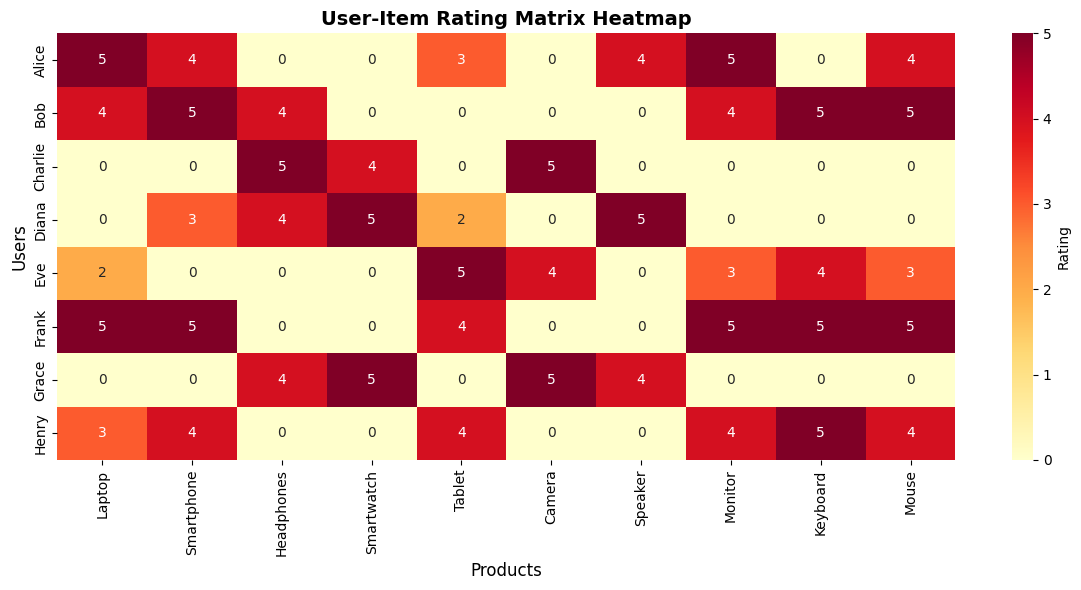

Note: Darker colors indicate higher ratings, while white cells represent no ratings (0).


In [ ]:
# Visualize the rating matrix
plt.figure(figsize=(12, 6))
sns.heatmap(ratings_df, annot=True, cmap='YlOrRd', fmt='g', cbar_kws={'label': 'Rating'})
plt.title('User-Item Rating Matrix Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Products', fontsize=12)
plt.ylabel('Users', fontsize=12)
plt.tight_layout()
plt.show()

print("Note: Darker colors indicate higher ratings, while white cells represent no ratings (0).")

## User-Based Collaborative Filtering

In **user-based collaborative filtering**, we:
1. Calculate similarity between users based on their rating patterns
2. Find users most similar to the target user
3. Recommend items that similar users liked but the target user hasn't rated yet

Let's implement this approach step by step.

In [ ]:
# Calculate user similarity using cosine similarity
# We'll use the ratings as feature vectors for each user

user_similarity = cosine_similarity(ratings_df)
user_similarity_df = pd.DataFrame(user_similarity, index=users, columns=users)

print("User Similarity Matrix (Cosine Similarity):")
print(user_similarity_df.round(3))
print("\nInterpretation:")
print("- Values close to 1 indicate very similar users")
print("- Values close to 0 indicate dissimilar users")

User Similarity Matrix (Cosine Similarity):
         Alice    Bob  Charlie  Diana    Eve  Frank  Grace  Henry
Alice    1.000  0.697    0.000  0.413  0.566  0.830  0.171  0.771
Bob      0.697  1.000    0.222  0.314  0.558  0.873  0.159  0.847
Charlie  0.000  0.222    1.000  0.554  0.277  0.000  0.884  0.000
Diana    0.413  0.314    0.554  1.000  0.127  0.218  0.758  0.227
Eve      0.566  0.558    0.277  0.127  1.000  0.758  0.248  0.796
Frank    0.830  0.873    0.000  0.218  0.758  1.000  0.000  0.987
Grace    0.171  0.159    0.884  0.758  0.248  0.000  1.000  0.000
Henry    0.771  0.847    0.000  0.227  0.796  0.987  0.000  1.000

Interpretation:
- Values close to 1 indicate very similar users
- Values close to 0 indicate dissimilar users


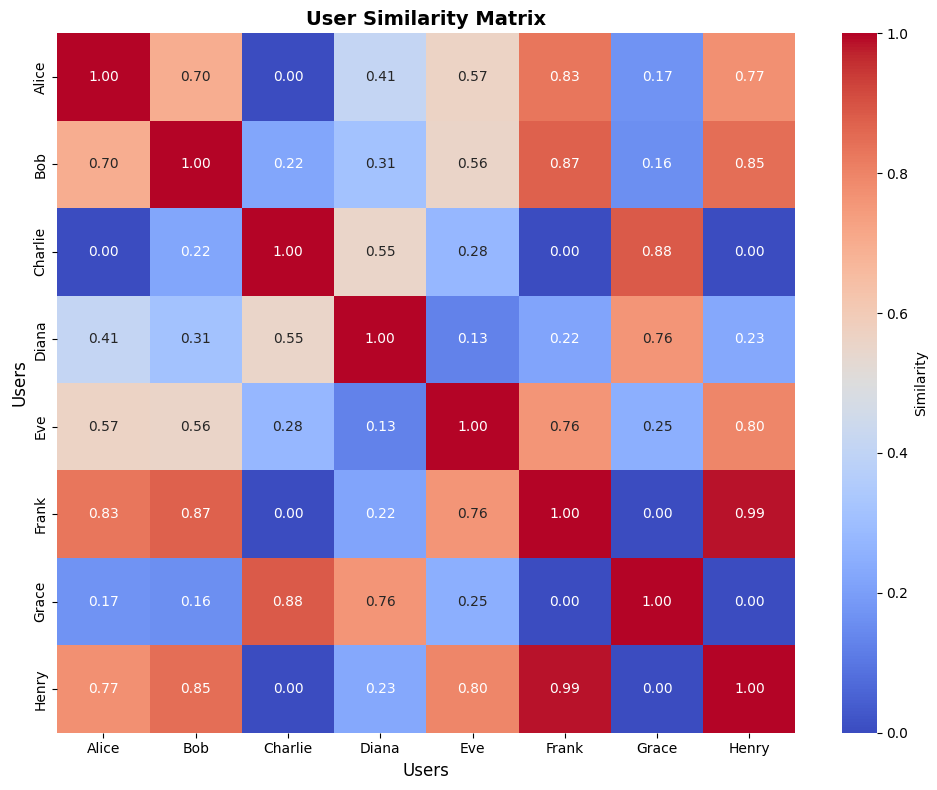


Key Insights:
- Most similar pair: ('Frank', 'Henry') (similarity: 0.987)


In [ ]:
# Visualize user similarity
plt.figure(figsize=(10, 8))
sns.heatmap(user_similarity_df, annot=True, cmap='coolwarm', fmt='.2f',
            vmin=0, vmax=1, center=0.5, cbar_kws={'label': 'Similarity'})
plt.title('User Similarity Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Users', fontsize=12)
plt.ylabel('Users', fontsize=12)
plt.tight_layout()
plt.show()

print("\nKey Insights:")
print(f"- Most similar pair: {user_similarity_df.where(np.triu(np.ones(user_similarity_df.shape), k=1).astype(bool)).stack().idxmax()} (similarity: {user_similarity_df.where(np.triu(np.ones(user_similarity_df.shape), k=1).astype(bool)).stack().max():.3f})")

In [ ]:
def get_user_recommendations(target_user, ratings_df, user_similarity_df, n_recommendations=3):
    """
    Generate product recommendations for a target user using collaborative filtering

    Parameters:
    - target_user: name of the user to generate recommendations for
    - ratings_df: user-item rating matrix
    - user_similarity_df: user similarity matrix
    - n_recommendations: number of recommendations to return

    Returns:
    - DataFrame with recommended products and predicted ratings
    """
    # Get the target user's ratings
    user_ratings = ratings_df.loc[target_user]

    # Find items the user hasn't rated yet
    unrated_items = user_ratings[user_ratings == 0].index

    # Get similarities to all other users
    similarities = user_similarity_df.loc[target_user]

    # Remove self-similarity
    similarities = similarities.drop(target_user)

    # Calculate predicted ratings for unrated items
    predictions = []

    for item in unrated_items:
        # Get ratings from other users for this item
        item_ratings = ratings_df[item]

        # Only consider users who have rated this item
        rated_by = item_ratings[item_ratings > 0].index

        if len(rated_by) == 0:
            continue

        # Calculate weighted average based on user similarity
        numerator = sum(similarities[user] * item_ratings[user] for user in rated_by if user in similarities.index)
        denominator = sum(abs(similarities[user]) for user in rated_by if user in similarities.index)

        if denominator > 0:
            predicted_rating = numerator / denominator
            predictions.append({'Product': item, 'Predicted Rating': predicted_rating})

    # Convert to DataFrame and sort by predicted rating
    recommendations_df = pd.DataFrame(predictions)
    recommendations_df = recommendations_df.sort_values('Predicted Rating', ascending=False)

    return recommendations_df.head(n_recommendations)

# Generate recommendations for Alice
target = 'Alice'
recommendations = get_user_recommendations(target, ratings_df, user_similarity_df, n_recommendations=5)

print(f"Top Recommendations for {target}:")
print(recommendations.to_string(index=False))
print(f"\n{target}'s current ratings:")
print(ratings_df.loc[target][ratings_df.loc[target] > 0].sort_values(ascending=False))

Top Recommendations for Alice:
   Product  Predicted Rating
Smartwatch          5.000000
  Keyboard          4.802576
    Camera          4.231958
Headphones          4.000000

Alice's current ratings:
Laptop        5
Monitor       5
Smartphone    4
Speaker       4
Mouse         4
Tablet        3


## Item-Based Collaborative Filtering

In **item-based collaborative filtering**, we:
1. Calculate similarity between items based on how users rated them
2. Find items most similar to those the user has already rated highly
3. Recommend similar items

This approach is often more scalable than user-based filtering because item similarities change less frequently than user preferences.

In [ ]:
# Calculate item similarity using cosine similarity
# Transpose the matrix to get items as rows

item_similarity = cosine_similarity(ratings_df.T)
item_similarity_df = pd.DataFrame(item_similarity, index=products, columns=products)

print("Item Similarity Matrix (Top 5x5):")
print(item_similarity_df.iloc[:5, :5].round(3))
print("\n...")
print("\nMost similar item pairs:")
# Find top 5 most similar pairs (excluding self-similarity)
similar_pairs = []
for i in range(len(products)):
    for j in range(i+1, len(products)):
        similar_pairs.append((products[i], products[j], item_similarity_df.iloc[i, j]))
similar_pairs.sort(key=lambda x: x[2], reverse=True)
for item1, item2, similarity in similar_pairs[:5]:
    print(f"  {item1} <-> {item2}: {similarity:.3f}")

Item Similarity Matrix (Top 5x5):
            Laptop  Smartphone  Headphones  Smartwatch  Tablet
Laptop       1.000       0.908       0.211       0.000   0.767
Smartphone   0.908       1.000       0.393       0.194   0.677
Headphones   0.211       0.393       1.000       0.864   0.112
Smartwatch   0.000       0.194       0.864       1.000   0.147
Tablet       0.767       0.677       0.112       0.147   1.000

...

Most similar item pairs:
  Laptop <-> Monitor: 0.991
  Monitor <-> Mouse: 0.989
  Laptop <-> Mouse: 0.979
  Laptop <-> Smartphone: 0.908
  Smartphone <-> Mouse: 0.901


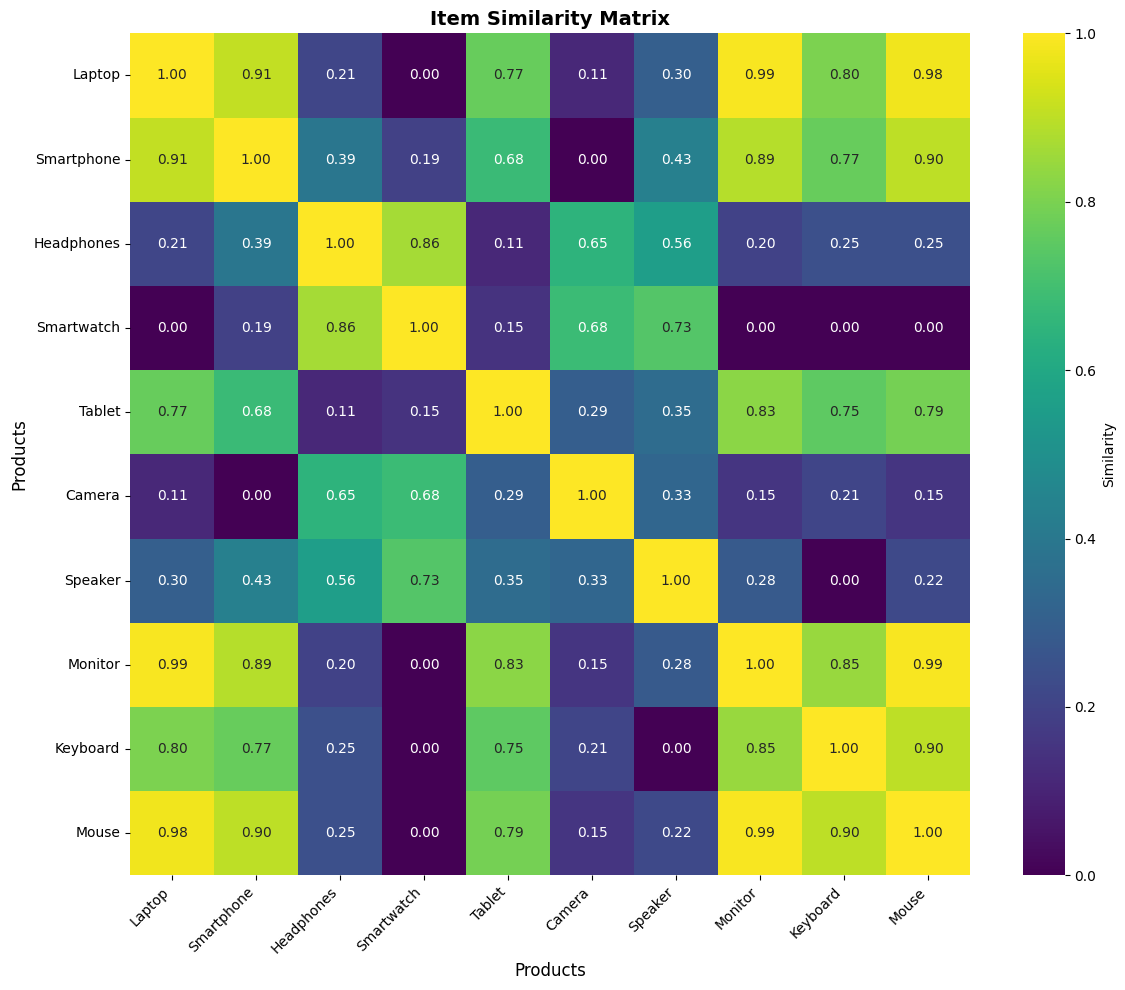


Insight: Items with high similarity are likely to be purchased together or by similar users.


In [ ]:
# Visualize item similarity
plt.figure(figsize=(12, 10))
sns.heatmap(item_similarity_df, annot=True, cmap='viridis', fmt='.2f',
            vmin=0, vmax=1, cbar_kws={'label': 'Similarity'})
plt.title('Item Similarity Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Products', fontsize=12)
plt.ylabel('Products', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nInsight: Items with high similarity are likely to be purchased together or by similar users.")

## Matrix Factorization with NMF

**Non-negative Matrix Factorization (NMF)** is an advanced technique that decomposes the user-item matrix into two lower-dimensional matrices:
- A user-feature matrix (representing user preferences for latent features)
- An item-feature matrix (representing how items relate to latent features)

This approach can handle sparse data better and uncover hidden patterns in user preferences.

For example, latent features might correspond to product categories like "tech accessories," "mobile devices," or "computer peripherals," even though these categories aren't explicitly defined.

In [ ]:
# Apply NMF to the ratings matrix
n_features = 3  # Number of latent features

# Replace 0s with NaN for NMF (NMF requires non-negative values, we'll use a small value)
ratings_for_nmf = ratings_df.replace(0, np.nan)
ratings_for_nmf = ratings_for_nmf.fillna(ratings_for_nmf.mean())

# Apply NMF
nmf_model = NMF(n_components=n_features, init='random', random_state=42, max_iter=500)
user_features = nmf_model.fit_transform(ratings_for_nmf)
item_features = nmf_model.components_

print("User-Feature Matrix:")
user_features_df = pd.DataFrame(user_features, index=users,
                                columns=[f'Feature {i+1}' for i in range(n_features)])
print(user_features_df.round(3))

print("\nItem-Feature Matrix:")
item_features_df = pd.DataFrame(item_features.T, index=products,
                               columns=[f'Feature {i+1}' for i in range(n_features)])
print(item_features_df.round(3))

# Reconstruct the matrix
reconstructed = user_features @ item_features
print("\nReconstruction error:", nmf_model.reconstruction_err_)

User-Feature Matrix:
         Feature 1  Feature 2  Feature 3
Alice        1.670      0.880      1.041
Bob          1.238      1.391      1.038
Charlie      1.312      1.451      0.719
Diana        2.110      0.991      0.003
Eve          0.471      2.338      0.155
Frank        1.330      1.200      1.442
Grace        1.346      1.410      0.701
Henry        1.172      1.734      0.402

Item-Feature Matrix:
            Feature 1  Feature 2  Feature 3
Laptop          1.638      0.339      1.651
Smartphone      0.651      1.561      1.615
Headphones      1.238      1.525      0.624
Smartwatch      1.605      1.571      0.423
Tablet          0.000      2.042      1.003
Camera          1.627      1.407      0.722
Speaker         1.591      1.472      0.174
Monitor         1.633      0.844      1.197
Keyboard        1.620      1.407      0.860
Mouse           1.445      1.000      1.245

Reconstruction error: 1.909149


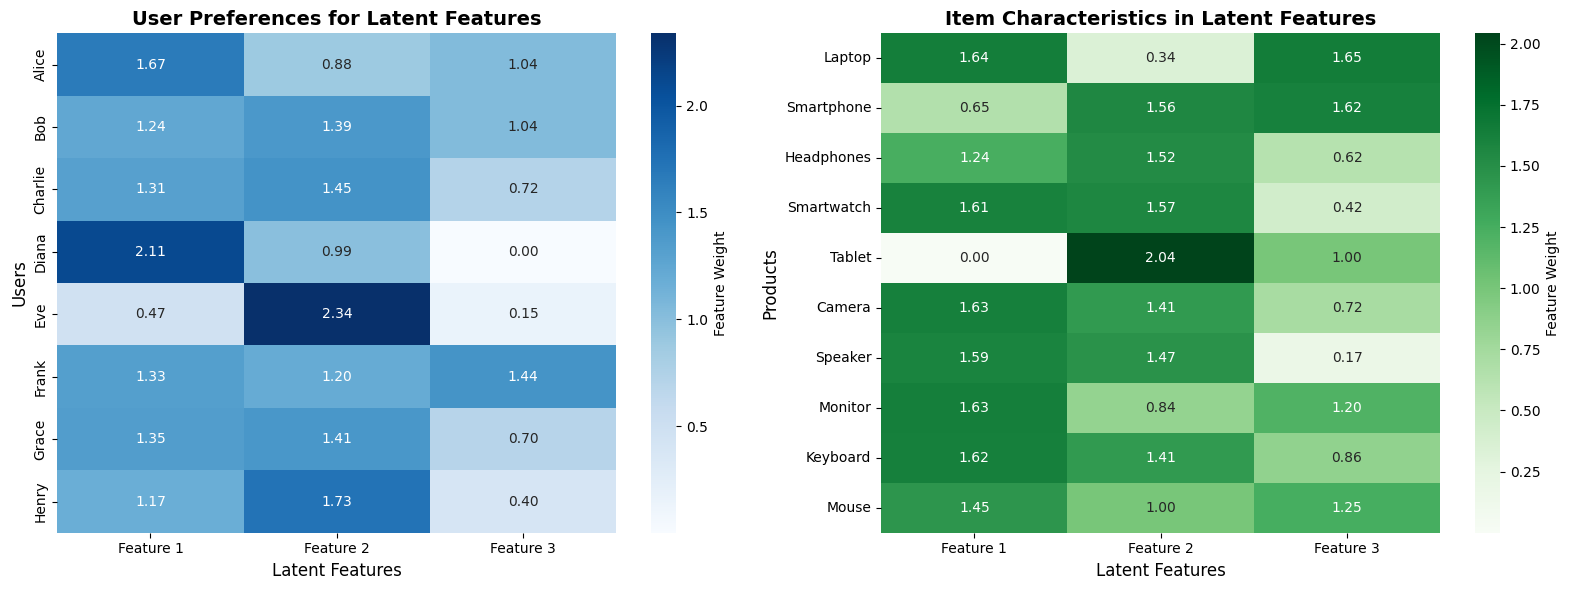

\nInterpretation:
- Each latent feature might represent a hidden product category or user preference
- Feature 1 might represent 'computer peripherals' (high for Keyboard, Mouse, Monitor)
- Feature 2 might represent 'mobile devices' (high for Smartphone, Tablet)
- Feature 3 might represent 'audio/visual equipment' (high for Camera, Speaker, Headphones)


In [ ]:
# Visualize the latent features
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# User features
sns.heatmap(user_features_df, annot=True, cmap='Blues', fmt='.2f', ax=axes[0],
            cbar_kws={'label': 'Feature Weight'})
axes[0].set_title('User Preferences for Latent Features', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Latent Features', fontsize=12)
axes[0].set_ylabel('Users', fontsize=12)

# Item features
sns.heatmap(item_features_df, annot=True, cmap='Greens', fmt='.2f', ax=axes[1],
            cbar_kws={'label': 'Feature Weight'})
axes[1].set_title('Item Characteristics in Latent Features', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Latent Features', fontsize=12)
axes[1].set_ylabel('Products', fontsize=12)

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Each latent feature might represent a hidden product category or user preference")
print("- Feature 1 might represent 'computer peripherals' (high for Keyboard, Mouse, Monitor)")
print("- Feature 2 might represent 'mobile devices' (high for Smartphone, Tablet)")
print("- Feature 3 might represent 'audio/visual equipment' (high for Camera, Speaker, Headphones)")

## Evaluating Recommendation Systems

Evaluating recommendation systems is challenging because we're predicting future user preferences. Common evaluation approaches include:

### 1. Rating Prediction Accuracy
- **Mean Absolute Error (MAE)**: Average absolute difference between predicted and actual ratings
  $$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

- **Root Mean Squared Error (RMSE)**: Square root of average squared differences
  $$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

### 2. Ranking Metrics
- **Precision@K**: Proportion of recommended items in top-K that are relevant
  $$Precision@K = \frac{\text{# of recommended items in top-K that are relevant}}{K}$$

- **Recall@K**: Proportion of relevant items that appear in top-K recommendations
  $$Recall@K = \frac{\text{# of recommended items in top-K that are relevant}}{\text{# of total relevant items}}$$

### 3. Business Metrics
- Click-through rate (CTR)
- Conversion rate
- Revenue per user
- User engagement time

### Challenges in Evaluation
1. **Cold Start Problem**: How to make recommendations for new users or items?
2. **Data Sparsity**: Most users only rate a small fraction of items
3. **Implicit Feedback**: Often we only have purchase data, not explicit ratings
4. **Temporal Dynamics**: User preferences change over time
5. **Diversity vs. Accuracy Trade-off**: Should we recommend similar items (high accuracy) or diverse items (better discovery)?

Evaluation Metrics for NMF Model:
  Mean Absolute Error (MAE): 0.218
  Root Mean Squared Error (RMSE): 0.275

Interpretation:
  - On average, our predictions are off by 0.22 stars
  - Lower values indicate better prediction accuracy


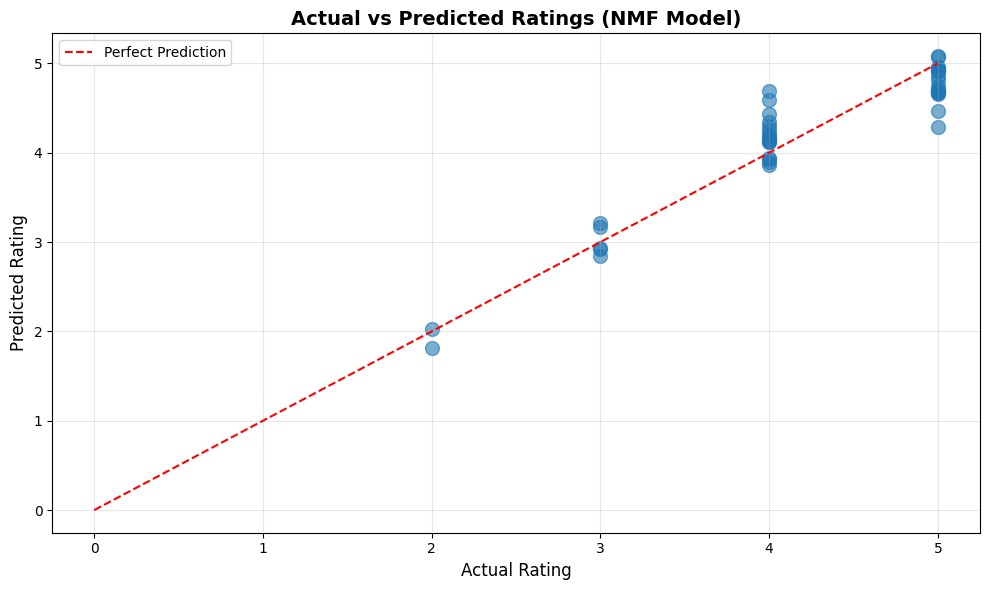

In [ ]:
# Calculate RMSE for our NMF model
# Compare reconstructed ratings with actual ratings (only for non-zero entries)

actual_ratings = []
predicted_ratings = []

for i, user in enumerate(users):
    for j, product in enumerate(products):
        if ratings_df.iloc[i, j] > 0:  # Only consider actual ratings
            actual_ratings.append(ratings_df.iloc[i, j])
            predicted_ratings.append(reconstructed[i, j])

actual_ratings = np.array(actual_ratings)
predicted_ratings = np.array(predicted_ratings)

# Calculate metrics
mae = np.mean(np.abs(actual_ratings - predicted_ratings))
rmse = np.sqrt(np.mean((actual_ratings - predicted_ratings) ** 2))

print(f"Evaluation Metrics for NMF Model:")
print(f"  Mean Absolute Error (MAE): {mae:.3f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"\nInterpretation:")
print(f"  - On average, our predictions are off by {mae:.2f} stars")
print(f"  - Lower values indicate better prediction accuracy")

# Visualize actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(actual_ratings, predicted_ratings, alpha=0.6, s=100)
plt.plot([0, 5], [0, 5], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Rating', fontsize=12)
plt.ylabel('Predicted Rating', fontsize=12)
plt.title('Actual vs Predicted Ratings (NMF Model)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Real-World Challenges and Considerations

### 1. The Cold Start Problem

**Challenge**: How do you recommend products to brand new users or recommend newly added products?

**Solutions**:
- **For new users**:
  - Use content-based filtering based on user demographics or preferences gathered during onboarding
  - Show popular items or trending products
  - Ask users to rate a few items to bootstrap their profile

- **For new items**:
  - Use content-based features (category, brand, price)
  - Show to diverse user groups to gather initial ratings
  - Leverage metadata and product descriptions

### 2. Data Sparsity

**Challenge**: Most users only interact with a tiny fraction of available products.

**Solutions**:
- Matrix factorization techniques (like NMF, SVD)
- Hybrid approaches combining collaborative and content-based filtering
- Incorporate implicit feedback (views, cart additions, wish lists)

### 3. Scalability

**Challenge**: Computing similarities for millions of users and products is computationally expensive.

**Solutions**:
- Use approximate nearest neighbor algorithms
- Pre-compute and cache item similarities (items change less than users)
- Employ distributed computing frameworks (Spark, Hadoop)
- Use sampling and dimensionality reduction

### 4. Filter Bubble / Echo Chamber

**Challenge**: Recommending only similar items limits user discovery and can create filter bubbles.

**Solutions**:
- Introduce serendipity: occasionally recommend diverse items
- Implement exploration vs. exploitation strategies (like epsilon-greedy)
- Use diversity metrics in recommendation ranking
- Show "because you liked X" explanations to help users understand recommendations

### 5. Privacy Concerns

**Challenge**: Recommendation systems require collecting and analyzing user behavior data.

**Solutions**:
- Implement federated learning (train models on user devices)
- Use differential privacy techniques
- Give users control over their data and recommendations
- Be transparent about data usage

### 6. Changing User Preferences

**Challenge**: User tastes evolve over time.

**Solutions**:
- Give more weight to recent interactions
- Implement time-decay functions in similarity calculations
- Regularly retrain models
- Allow users to explicitly indicate preference changes

### 7. Business Objectives vs. User Experience

**Challenge**: Balancing recommendation quality with business goals (profit, inventory clearance, sponsored products).

**Solutions**:
- Multi-objective optimization
- A/B testing to find the right balance
- Clearly distinguish between organic and sponsored recommendations
- Monitor user engagement metrics alongside revenue

## Hands-On Exercise: Build Your Own Recommendation System

Now it's your turn! Try implementing a recommendation system with different approaches.

**Task**:
1. Generate recommendations for a user of your choice using both user-based and item-based collaborative filtering
2. Compare the recommendations from both approaches
3. Try changing the number of latent features in NMF and observe how it affects predictions
4. Bonus: Create a content-based filter using product features (you'll need to define product attributes)

Use the code cells below to experiment:

User-based recommendations for Charlie:
 Product  Predicted Rating
Keyboard          4.444883
 Speaker          4.385357
   Mouse          3.889766

Charlie's current high-rated items:
Headphones    5
Camera        5
Smartwatch    4


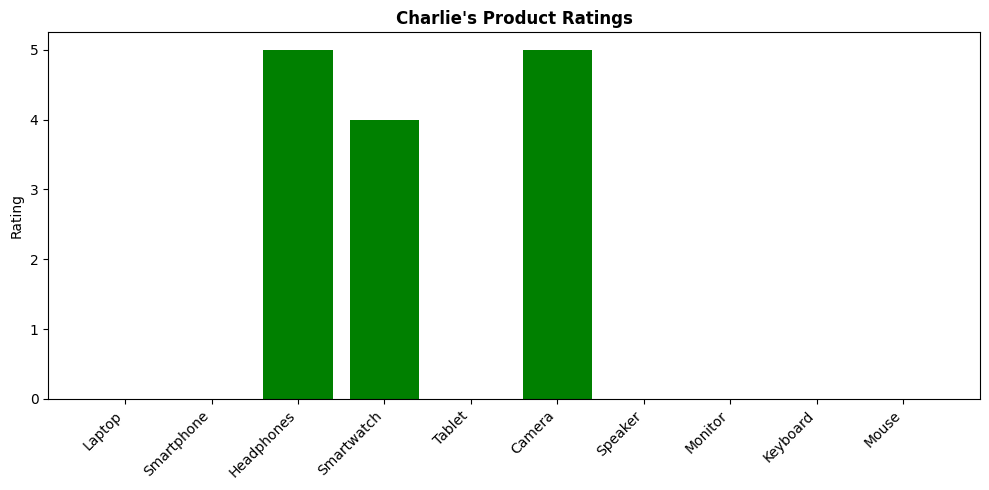

In [ ]:
# Exercise: Generate recommendations for Charlie

# TODO: Try these tasks:
# 1. Get recommendations for Charlie using the user-based approach
# 2. Implement an item-based recommendation function
# 3. Compare the results

# Your code here:
target_user = 'Charlie'

# User-based recommendations
print(f"User-based recommendations for {target_user}:")
user_based_recs = get_user_recommendations(target_user, ratings_df, user_similarity_df, n_recommendations=3)
print(user_based_recs.to_string(index=False))

print(f"\n{target_user}'s current high-rated items:")
print(ratings_df.loc[target_user][ratings_df.loc[target_user] > 0].sort_values(ascending=False))

# Bonus: Visualize Charlie's preferences
plt.figure(figsize=(10, 5))
charlie_ratings = ratings_df.loc[target_user]
colors = ['green' if r > 0 else 'lightgray' for r in charlie_ratings]
plt.bar(range(len(charlie_ratings)), charlie_ratings, color=colors)
plt.xticks(range(len(products)), products, rotation=45, ha='right')
plt.ylabel('Rating')
plt.title(f"{target_user}'s Product Ratings", fontweight='bold')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

## Key Takeaways

1. **Recommendation systems are essential for e-commerce**: They drive significant revenue and improve user experience by personalizing product discovery.

2. **Three main approaches exist**:
   - **Content-based filtering**: Recommends items similar to what users liked before
   - **Collaborative filtering**: Uses patterns from many users to make recommendations
   - **Hybrid systems**: Combine multiple approaches for better performance

3. **Cosine similarity is a fundamental metric**: It measures the similarity between users or items based on their rating patterns, focusing on direction rather than magnitude.

4. **User-based vs. item-based collaborative filtering**:
   - User-based finds similar users and recommends what they liked
   - Item-based finds similar items to what users already rated highly
   - Item-based is often more scalable for large catalogs

5. **Matrix factorization reveals hidden patterns**: Techniques like NMF decompose the rating matrix to discover latent features that explain user preferences.

6. **Evaluation is multi-faceted**: Consider accuracy metrics (RMSE, MAE), ranking metrics (Precision@K, Recall@K), and business metrics (CTR, revenue).

7. **Real-world challenges require thoughtful solutions**:
   - Cold start problems need bootstrapping strategies
   - Data sparsity requires advanced techniques like matrix factorization
   - Scalability demands efficient algorithms and infrastructure
   - Privacy and ethics must be considered in system design

8. **The exploration-exploitation trade-off matters**: Balance showing users what they'll probably like (exploitation) with introducing them to new items (exploration).

9. **Recommendation systems continually evolve**: Modern systems incorporate deep learning, contextual information (time, location), and multi-modal data (images, text, behavior).

10. **Business impact is measurable**: Track not just algorithmic metrics but also user engagement, satisfaction, and revenue to assess true system value.

## Further Resources

### Documentation and Tutorials
1. **Scikit-learn Documentation**: https://scikit-learn.org/stable/modules/decomposition.html
   - Matrix factorization techniques including NMF and SVD

2. **Surprise Library**: http://surpriselib.com/
   - Python scikit specialized for recommender systems

3. **TensorFlow Recommenders**: https://www.tensorflow.org/recommenders
   - Deep learning-based recommendation systems

### Research Papers
4. **"Matrix Factorization Techniques for Recommender Systems"** by Koren, Bell, and Volinsky (2009)
   - Classic paper on collaborative filtering and matrix factorization

5. **"The Netflix Prize"** documentation
   - Case study of a real-world recommendation challenge

### Books
6. **"Recommender Systems Handbook"** edited by Ricci, Rokach, and Shapira
   - Comprehensive resource covering all aspects of recommendation systems

7. **"Programming Collective Intelligence"** by Toby Segaran
   - Practical guide to building recommendation systems

### Online Courses
8. **Coursera - Recommender Systems Specialization** (University of Minnesota)
   - In-depth course on recommendation algorithms

### Industry Examples
9. **Netflix Tech Blog**: https://netflixtechblog.com/
   - Real-world implementations and challenges

10. **Amazon Science - Recommendations**: https://www.amazon.science/tag/recommendations
    - Research and innovations in e-commerce recommendations

### Practice Datasets
- **MovieLens**: https://grouplens.org/datasets/movielens/
- **Amazon Product Reviews**: https://nijianmo.github.io/amazon/index.html
- **Book-Crossing Dataset**: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

Happy learning! Recommendation systems are a fascinating field at the intersection of machine learning, human behavior, and business value.